In [4]:
# imports
import pandas as pd # for using pandas data frames
import numpy as np # for converting numpy array to data frame

In [5]:
# imports for graphs and plotting
#get_ipython().system('pip install ggplot')
#get_ipython().system('pip install plotnine')

In [6]:
from plotnine import ggplot, aes, geom_line

#import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

from matplotlib.pylab import rcParams

rcParams['figure.figsize']=20,10

In [7]:

# reading from csv data file as pandas data frame
df = pd.read_csv(r'cleaned_data02.csv')

# checking the data (rows 1-10)
print(df[1:10])

       country iso3c iso2c  year  Intentional_homicides_per100k  \
1  Afghanistan   AFG    AF  2010                       3.368110   
2  Afghanistan   AFG    AF  2011                       4.087337   
3  Afghanistan   AFG    AF  2012                       6.251328   
4  Afghanistan   AFG    AF  2015                       9.783922   
5  Afghanistan   AFG    AF  2016                       6.551163   
6  Afghanistan   AFG    AF  2017                       6.678401   
7  Afghanistan   AFG    AF  2018                       6.655561   
8      Albania   ALB    AL  2000                       4.186312   
9      Albania   ALB    AL  2001                       7.029425   

   Suicide_mortality_rate_per100k        GDP_us  GDP_per_capita  \
1                             4.3  1.585668e+10     1710.575411   
2                             4.1  1.780511e+10     1699.488110   
3                             4.0  1.990732e+10     1914.774228   
4                             4.0  1.913421e+10     2087.3053

In [8]:
# creating a data frame from raw data with headings
data_frame = pd.DataFrame(np.array(df), columns = ['country', 'iso3c', 'iso2c', 'year', 'Intentional_homicides_per100k', 'Suicide_mortality_rate_per100k', 'GDP_us', 'GDP_per_capita', 'adminregion', 'incomeLevel'])
data_frame.head()

,country,iso3c,iso2c,year,Intentional_homicides_per100k,Suicide_mortality_rate_per100k,GDP_us,GDP_per_capita,adminregion,incomeLevel
0,Afghanistan,AFG,AF,2009,3.926774,4.4,12416161049.0,1519.692923,South Asia,Low income
1,Afghanistan,AFG,AF,2010,3.36811,4.3,15856678596.0,1710.575411,South Asia,Low income
2,Afghanistan,AFG,AF,2011,4.087337,4.1,17805113119.0,1699.48811,South Asia,Low income
3,Afghanistan,AFG,AF,2012,6.251328,4.0,19907317066.0,1914.774228,South Asia,Low income
4,Afghanistan,AFG,AF,2015,9.783922,4.0,19134211764.0,2087.305323,South Asia,Low income


In [9]:
# removing blank rows from data frame, setting threshold of 1 - anything with 1 NaN will be removed
newdf = data_frame = data_frame.dropna(thresh=10)

newdf.head()

,country,iso3c,iso2c,year,Intentional_homicides_per100k,Suicide_mortality_rate_per100k,GDP_us,GDP_per_capita,adminregion,incomeLevel
0,Afghanistan,AFG,AF,2009,3.926774,4.4,12416161049.0,1519.692923,South Asia,Low income
1,Afghanistan,AFG,AF,2010,3.36811,4.3,15856678596.0,1710.575411,South Asia,Low income
2,Afghanistan,AFG,AF,2011,4.087337,4.1,17805113119.0,1699.48811,South Asia,Low income
3,Afghanistan,AFG,AF,2012,6.251328,4.0,19907317066.0,1914.774228,South Asia,Low income
4,Afghanistan,AFG,AF,2015,9.783922,4.0,19134211764.0,2087.305323,South Asia,Low income


In [10]:
# checking the size of the data set
newdf.shape

(1487, 10)

In [11]:
# saving to new csv
#newdf.to_csv('cleaned_data02.csv')

 We have now cut our data from 13,000+ rows down to 1,411 after removing any rows which were mostly blank (NaN) rows. Our reasoning for this was due to missing values would cause issues when implementing any machine learning modules.
 
Data Exploration
 We now want to create some graphs to help visualize the current data

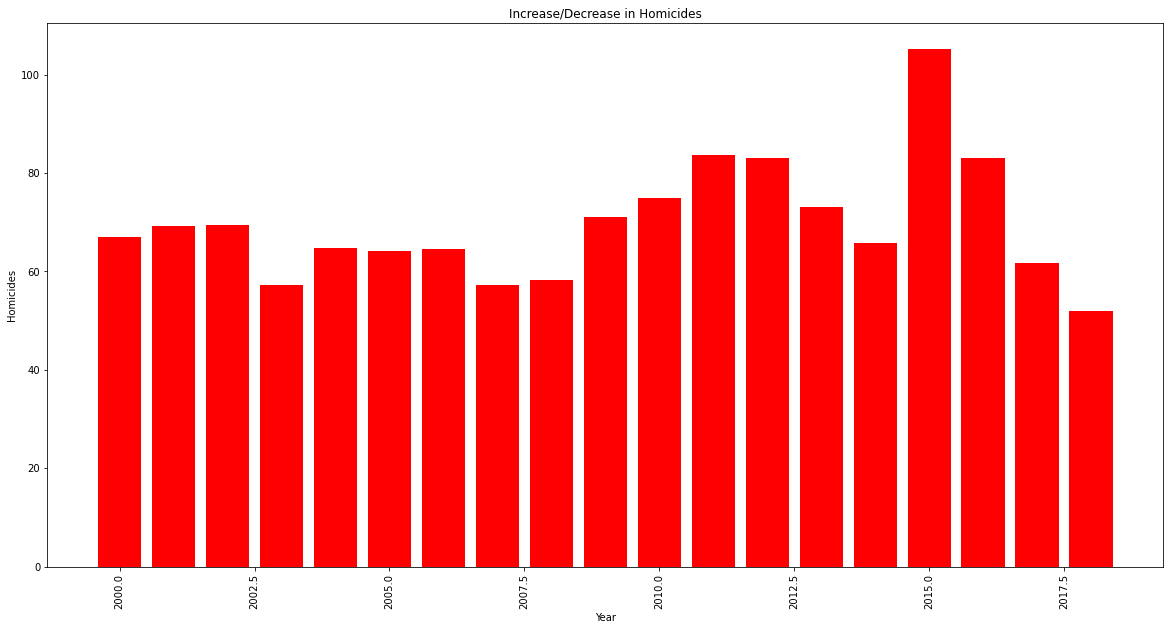

In [12]:
year = newdf['year']
homicides = newdf['Intentional_homicides_per100k']

plt.bar(year, homicides, color="red")

plt.xlabel('Year')

plt.ylabel('Homicides')

plt.title('Increase/Decrease in Homicides')

plt.xticks(rotation=90)

plt.show()

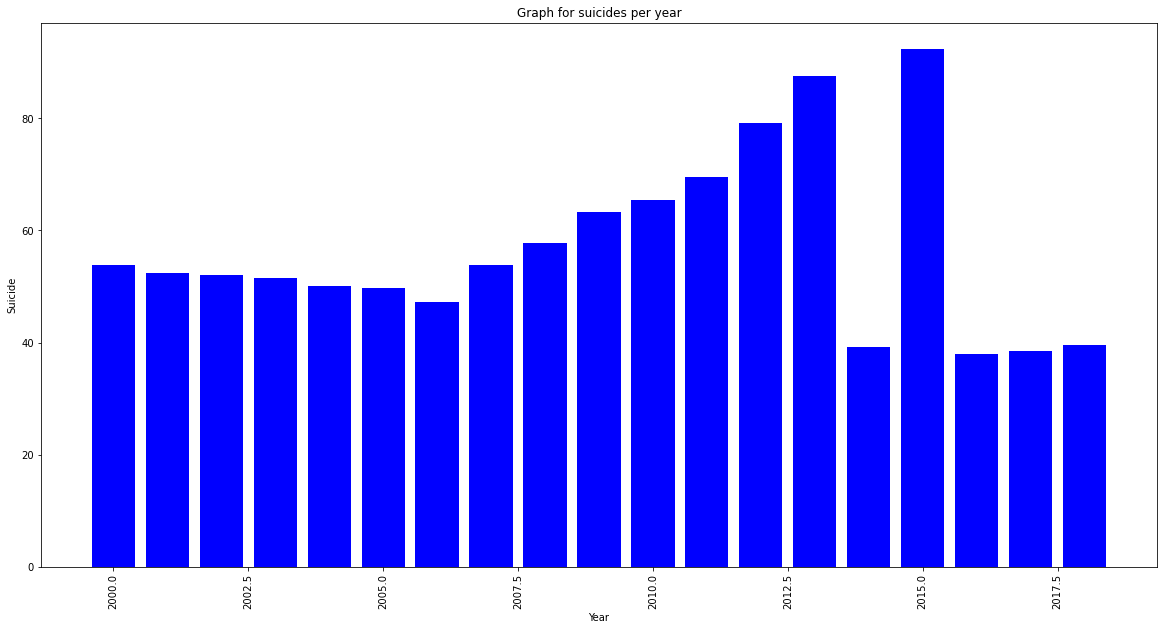

In [13]:
year = newdf['year']
Suicide = newdf['Suicide_mortality_rate_per100k']

plt.bar(year, Suicide, color="blue")

plt.xlabel('Year')

plt.ylabel('Suicide')

plt.title('Graph for suicides per year')

plt.xticks(rotation=90)

plt.show()

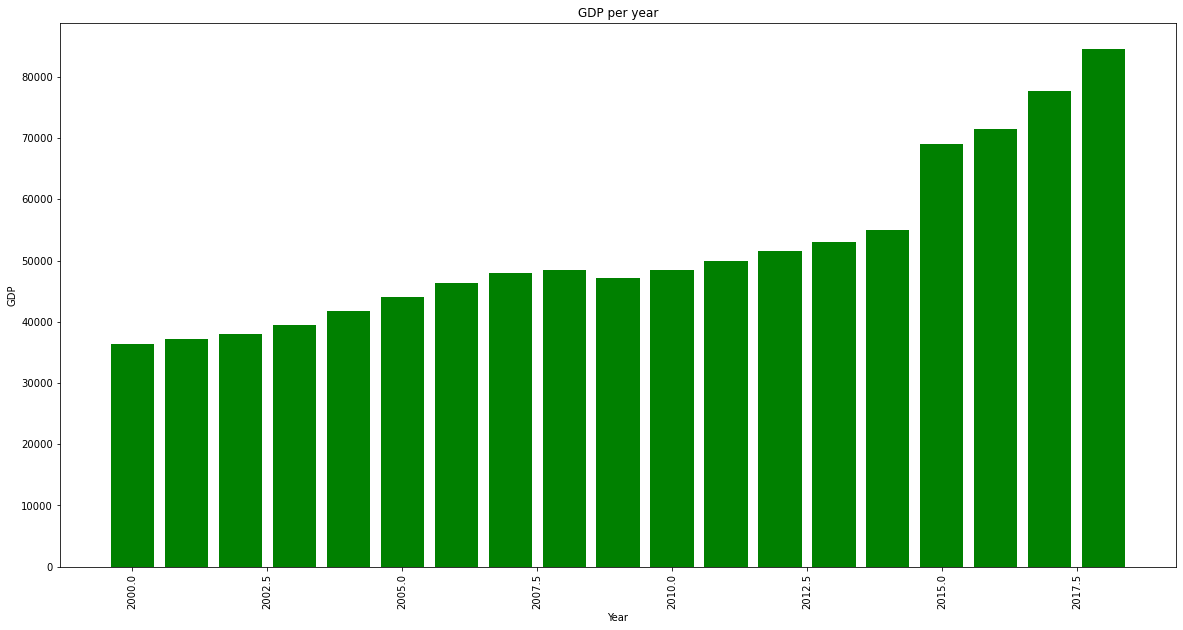

In [14]:
year = newdf['year']
GDP = newdf['GDP_per_capita']

plt.bar(year, GDP, color="green")

plt.xlabel('Year')

plt.ylabel('GDP')

plt.title('GDP per year')

plt.xticks(rotation=90)

plt.show()

Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

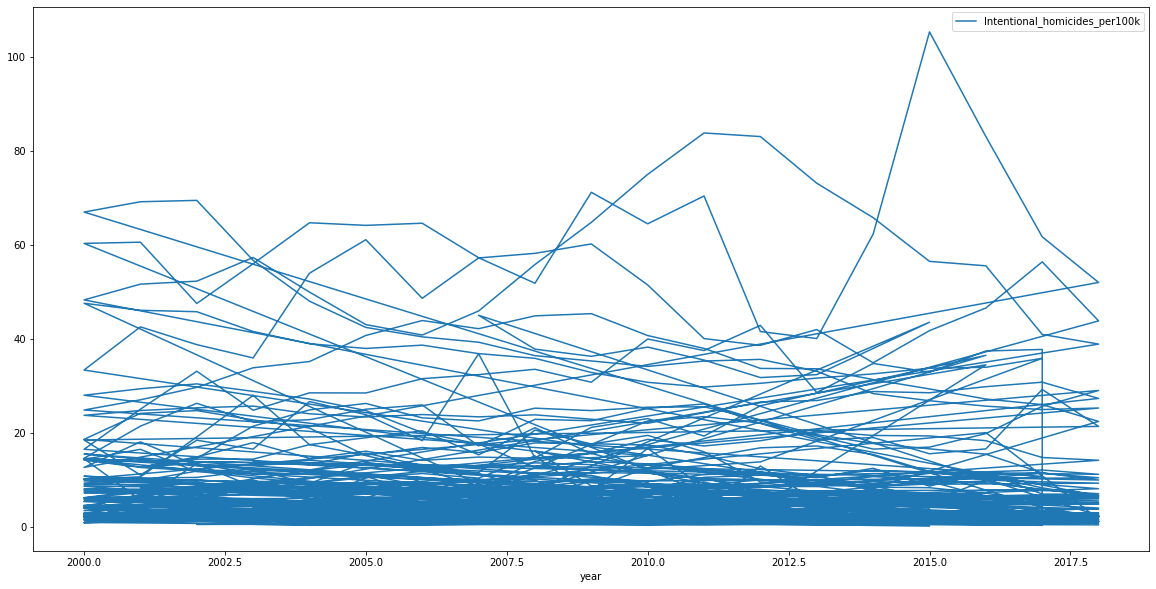

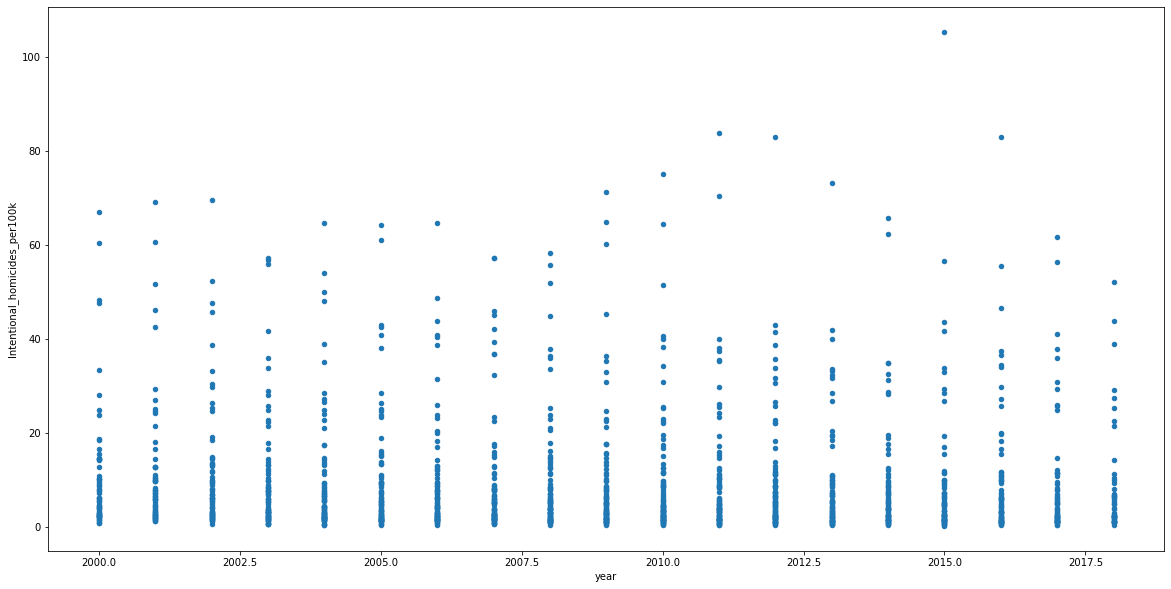

In [16]:
regression = pd.read_csv('cleaned_data02.csv')
regression.shape
regression.head(10)
regression.plot('year', 'Intentional_homicides_per100k')
regression.plot.scatter('year', 'Intentional_homicides_per100k')
x_train, x_test, y_train, y_test = train_test_split(regression.year, regression.Intentional_homicides_per100k, test_size = 0.2)
regr = LinearRegression()
regr.fit(np.array(x_train).reshape(-1,1), y_train)
preds = regr.predict(np.array(x_test).reshape(-1,1))
y_test.head()
preds
residuals = preds - y_test
#plt.hist(residuals)
#mean_squared_error(y_test,preds)**0.5




(array([  1.,   0.,   1.,   3.,   5.,   4.,  10.,  24.,  30., 220.]),
 array([-96.13327021, -85.54790271, -74.96253522, -64.37716772,
        -53.79180022, -43.20643273, -32.62106523, -22.03569773,
        -11.45033024,  -0.86496274,   9.72040476]),
 <BarContainer object of 10 artists>)

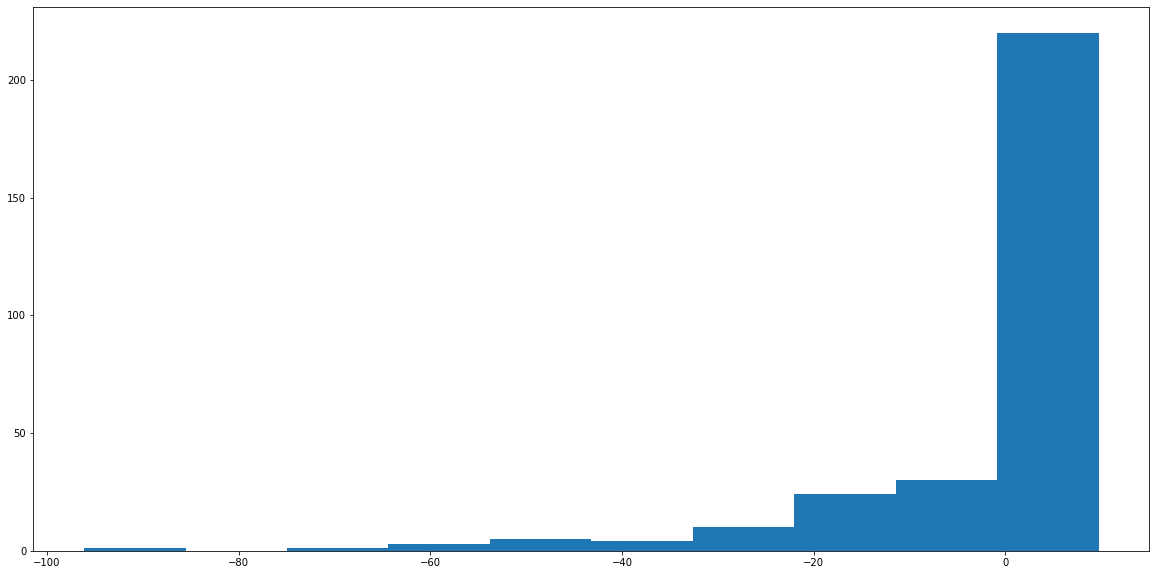

In [17]:
plt.hist(residuals)

In [18]:
mean_squared_error(y_test, preds) ** 0.5

14.536325299587416

The mean squared error tells us how far off the line of best fit the regressed predictions are.

Mean Squared Error = 12.691 

In [19]:
dataset = pd.read_csv("cleaned_data02.csv")
dataset.head()

,country,iso3c,iso2c,year,Intentional_homicides_per100k,Suicide_mortality_rate_per100k,GDP_us,GDP_per_capita,adminregion,incomeLevel
0,Afghanistan,AFG,AF,2009,3.926774,4.4,1.241616e+10,1519.692923,South Asia,Low income
1,Afghanistan,AFG,AF,2010,3.368110,4.3,1.585668e+10,1710.575411,South Asia,Low income
2,Afghanistan,AFG,AF,2011,4.087337,4.1,1.780511e+10,1699.488110,South Asia,Low income
3,Afghanistan,AFG,AF,2012,6.251328,4.0,1.990732e+10,1914.774228,South Asia,Low income
4,Afghanistan,AFG,AF,2015,9.783922,4.0,1.913421e+10,2087.305323,South Asia,Low income


In [20]:
dataset.shape



(1487, 10)

In [21]:
dataset.isna().sum()
dataset.duplicated().any()

False

C:\Users\jorda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
C:\Users\jorda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


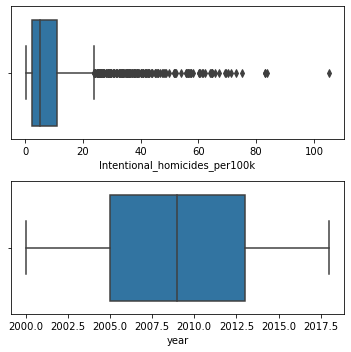

In [22]:
import seaborn as sns

fig, axs = plt.subplots(2, figsize = (5,5))

plt1 = sns.boxplot(dataset['Intentional_homicides_per100k'], ax = axs[0])

plt2 = sns.boxplot(dataset['year'], ax = axs[1])

plt.tight_layout()

<AxesSubplot:xlabel='Count', ylabel='GDP_us'>

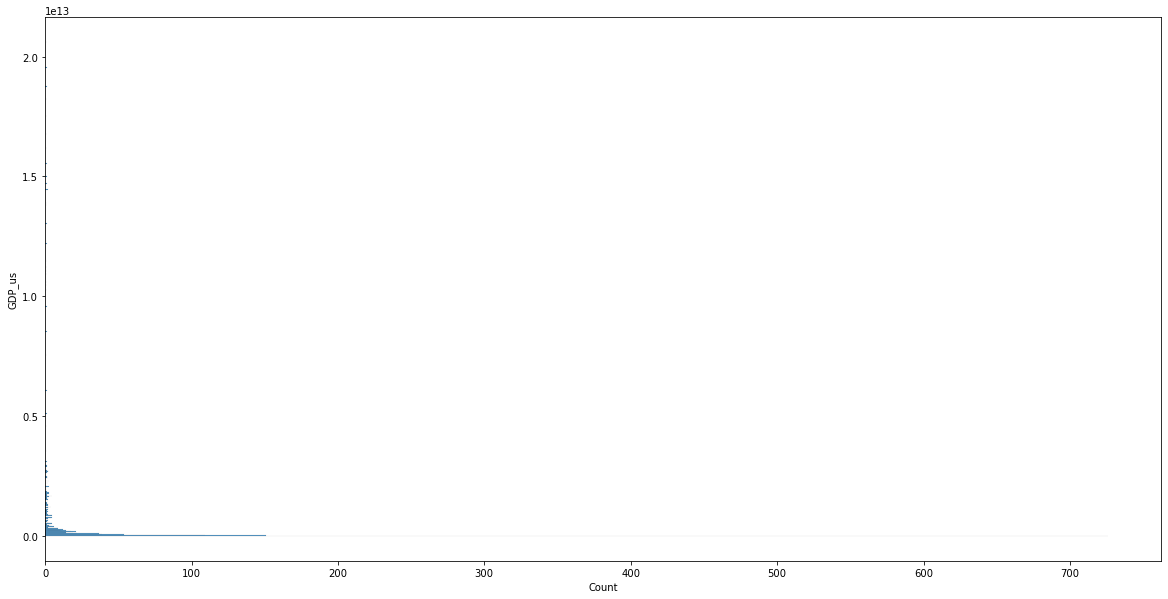

In [23]:
sns.histplot(data=dataset, y='GDP_us')

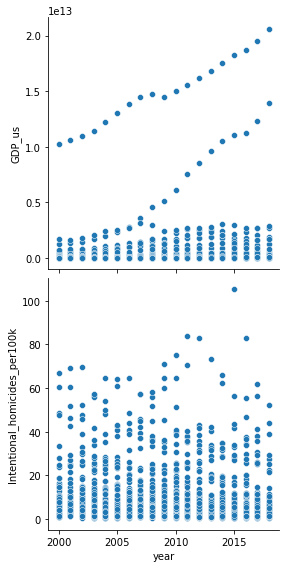

In [24]:
sns.pairplot(dataset, x_vars='year', y_vars=['GDP_us', 'Intentional_homicides_per100k'], height=4, aspect=1, kind='scatter')

plt.show()

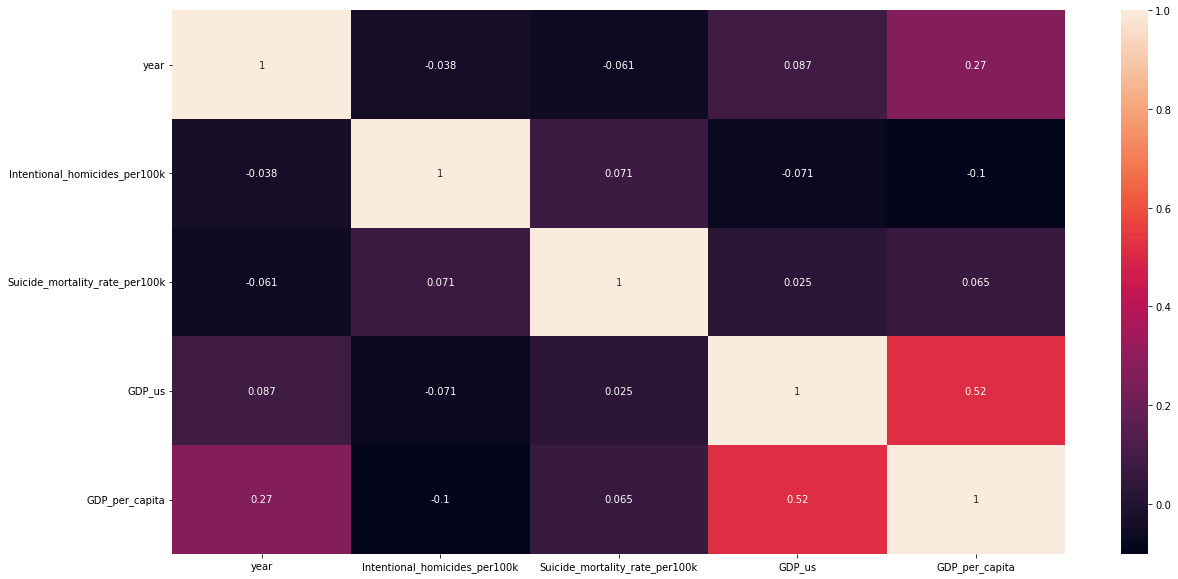

In [25]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

The above Pearson correlation matrix uses multiple independent variables with the dependent variable being 'year'.

## Ho : The rates of homicide per 100k have not rapidly changed from 2000-2018

## H1 : There has been a rapid change (increase or decrease) in homicide rates from 2000-2018

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [56]:
#Setting the value for X and Y
x = dataset[['year']]
y = dataset['Intentional_homicides_per100k']



In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [58]:
slr = LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [59]:
#Printing the model coefficients

print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  157.22757826552103
Coefficient: [-0.07325798]


In [60]:
print('Regression Equation: year = 157.22 + -0.07325798 * N of homicides')

Regression Equation: year = 157.22 + -0.07325798 * N of homicides


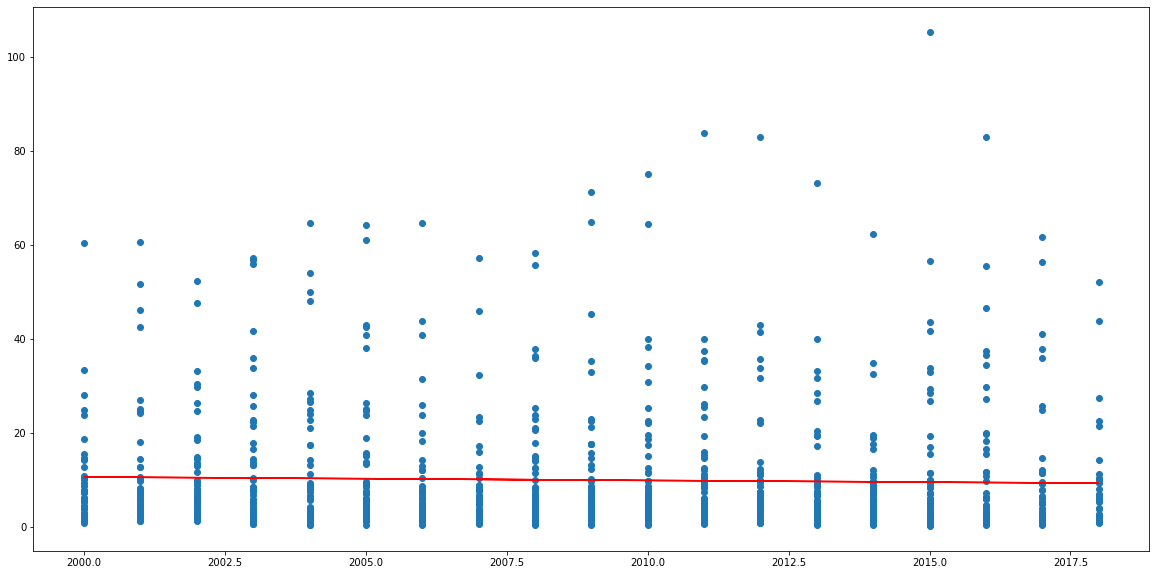

In [66]:
#Line of best fit

plt.scatter(x_train, y_train)
plt.plot(x_train, 157.22 + -0.07325798*x_train, 'r')
plt.show()

In [67]:
#Prediction of Test and Training set result  

y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [68]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 9.90577581  9.5394859   9.68600186  9.97903379  9.97903379 10.05229177
 10.63835563  9.75925984 10.3453237  10.12554975 10.3453237   9.46622791
 10.19880774 10.63835563 10.27206572 10.12554975 10.12554975  9.83251783
 10.12554975 10.3453237   9.61274388 10.49183967 10.3453237   9.46622791
  9.68600186 10.71161361 10.3453237   9.68600186 10.12554975 10.19880774
 10.71161361 10.3453237   9.97903379  9.39296993 10.3453237   9.46622791
 10.56509765  9.68600186 10.63835563 10.41858168  9.68600186 10.19880774
  9.5394859  10.19880774 10.19880774 10.05229177  9.5394859  10.12554975
  9.39296993  9.46622791 10.27206572 10.41858168  9.5394859   9.75925984
  9.75925984 10.12554975 10.05229177  9.90577581 10.27206572 10.3453237
 10.71161361  9.46622791 10.3453237   9.46622791 10.27206572  9.68600186
 10.05229177  9.68600186  9.39296993  9.61274388 10.05229177  9.90577581
  9.83251783 10.12554975 10.41858168 10.27206572 10.27206572 10.19880774
 10.56509765 10.27206572  9

In [69]:
#Actual value and the predicted value

slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
258,0.559635,9.905776
57,6.033310,9.539486
225,28.849832,9.686002
1335,0.961714,9.979034
499,4.561981,9.979034
...,...,...
739,10.502697,9.905776
561,1.148705,9.466228
531,3.745809,9.905776
1098,8.727260,9.832518


In [79]:
# Predict avg homicides per 100k for any given year
slr.predict([[2009]])

array([10.05229177])

In [80]:
# print the R-squared value for the model

from sklearn.metrics import accuracy_score

print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 0.13


In [81]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 8.622248557264957
Mean Square Error: 159.22596942955707
Root Mean Square Error: 12.618477302335535


In [85]:
import statsmodels.api as sm

# adding a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

In [86]:
# fitting the regression line using Ordinary Least Square
lr = sm.OLS(y_train, x_train_sm).fit()

In [87]:
# Printing the params
lr.params

const    157.227578
year      -0.073258
dtype: float64

In [88]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Intentional_homicides_per100k   R-squared:                       0.001
Model:                                       OLS   Adj. R-squared:                 -0.000
Method:                            Least Squares   F-statistic:                    0.8272
Date:                           Tue, 29 Mar 2022   Prob (F-statistic):              0.363
Time:                                   17:17:31   Log-Likelihood:                -4176.1
No. Observations:                           1040   AIC:                             8356.
Df Residuals:                               1038   BIC:                             8366.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.2276    161.818      0.972      0.331    -160.300     474.755
year          -0.0733      0.081     -0.909      0.363      -0.231       0.085
==============================================================================
Omnibus:                      617.931   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4695.156
Skew:                           2.732   Prob(JB):                         0.00
Kurtosis:                      11.860   Cond. No.                     7.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The main statistics we are concerned with to check a viable model
### The coefficiens and P-Value (sig. value)
### R-Squared Value
### F-Statistic and its significance

#### Our coefficient for the 'Year' is -0.0733 and its corresponding P-Value is > 0.05 therefore we can accept the null hypothesis

## R-Sqaured Value is 0.001 which means 01% of the years variance can be explained by the 'homicides per 100k'.

## The F-Statistic has a P-Value of > 0.05 which tells us that the model fit is not statistically significant.

## From the parameters we produced the values of the intercept and the slope for the straight line. The equation of the line is
 
 ### year = 157.22 + -0.07 * 2017


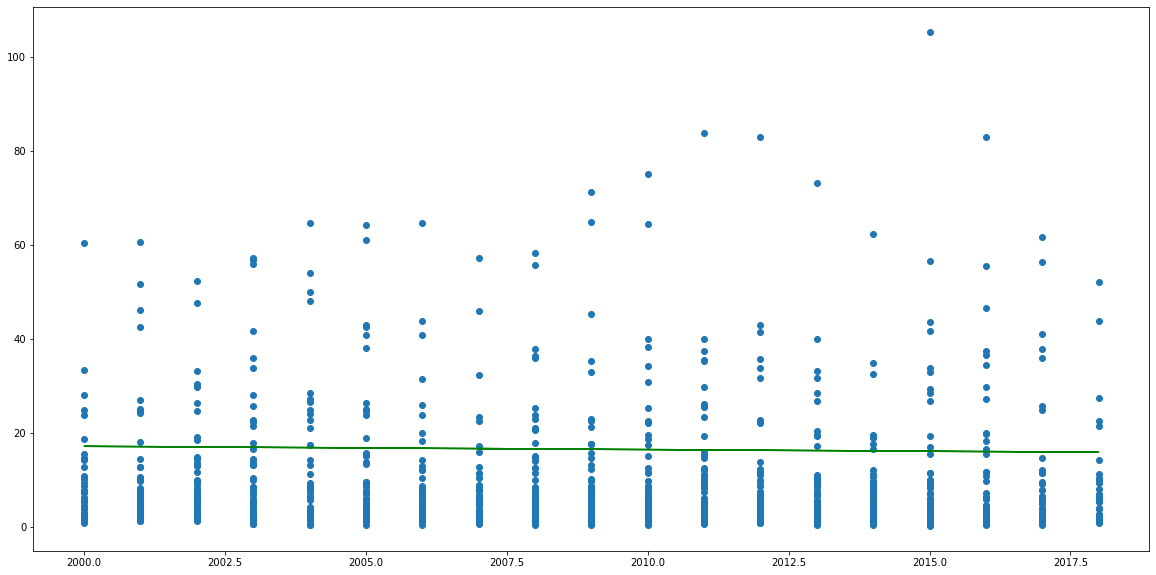

In [94]:
# visualize the regression line
plt.scatter(x_train, y_train)
plt.plot(x_train, 157.22 + -0.07*x_train, 'g')
plt.show()